In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_title_short'>

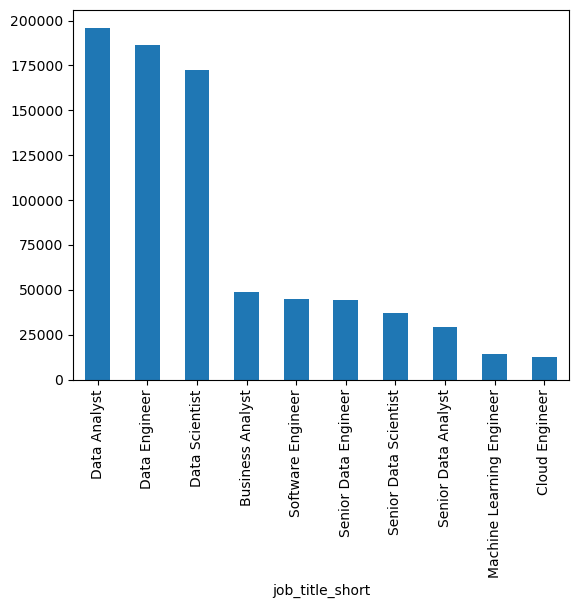

In [4]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar')

In [5]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [6]:
df['job_schedule_type'].value_counts().head(4)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Part-time       7881
Name: count, dtype: int64

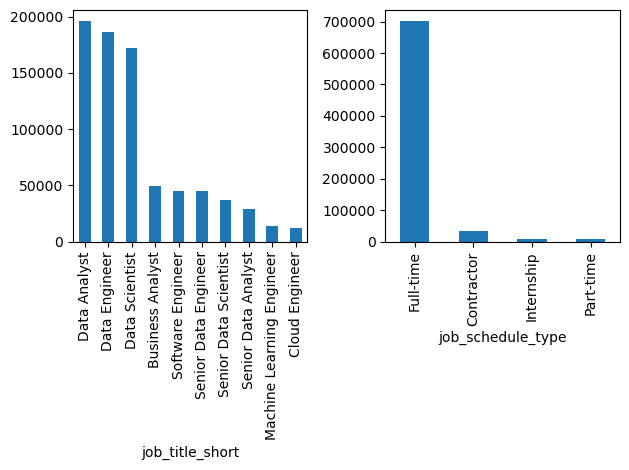

In [7]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(4).plot(kind='bar', ax=ax[1])

fig.tight_layout()

In [14]:
df_exploded = df.explode('job_skills')
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = skills_count.reset_index(name= 'skills_count')
df_skills_count = df_skills_count.sort_values(by= 'skills_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skills_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [15]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

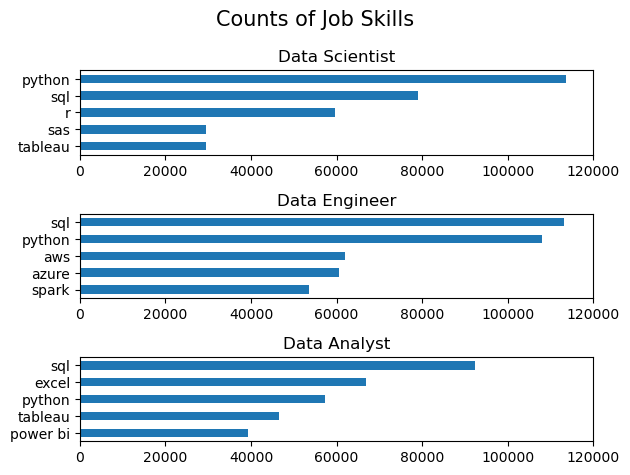

In [18]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skills_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

fig.suptitle('Counts of Job Skills', fontsize=15)
fig.tight_layout()